In [1]:
import os
import datetime as dt
import pandas as pd
import sqlite3 as lite

In [2]:
pd.set_option('display.width', 160)

In [3]:
%matplotlib inline
import matplotlib.pyplot as pyplt
pyplt.rcParams['figure.figsize'] = (24, 5)

In [4]:
now_dt = dt.datetime.now()
# strdate = '20191030'
# strdate2 = '2019-10-30'
strdate = now_dt.strftime('%Y%m%d')
strdate2 = now_dt.strftime('%Y-%m-%d')

In [5]:
pjt_path = os.path.dirname(os.getcwd())
target_db = pjt_path + '/DataLoader/dataloader/TAQ_Data/TAQ_%s.db' % strdate
conn = lite.connect(target_db)
sqltext = "SELECT * FROM TickData WHERE securitiestype = 'futures' AND feedsource = 'xing' AND datetime < '%s'" % (strdate2 + ' 17:00:00')
# sqltext = "SELECT * FROM FutOptTickData WHERE SecuritiesType = 'futures' AND FeedSource = 'cybos'"
df = pd.read_sql(sqltext, conn)
df = df[['shortcd', 'taq', 'datetime', 'buysell', 'lastprice', 'lastqty', 'askqty1', 'ask1', 'bid1', 'bidqty1']]

In [6]:
sqltext = """
SELECT 
DISTINCT(shortcd) 
FROM TickData 
WHERE 
SecuritiesType = 'futures' AND 
-- FeedSource = 'cybos' AND 
FeedSource = 'xing' AND 
shortcd LIKE '101%' 
ORDER BY shortcd
"""
df_big_shortcd = pd.read_sql(sqltext, conn)
sqltext = """
SELECT 
DISTINCT(shortcd) 
FROM TickData 
WHERE 
SecuritiesType = 'futures' AND 
-- FeedSource = 'cybos' AND 
FeedSource = 'xing' AND 
shortcd LIKE '105%' 
ORDER BY shortcd 
"""
df_mini_shortcd = pd.read_sql(sqltext, conn)
big_shortcd = df_big_shortcd['shortcd'].iloc[0]
mini_shortcd = df_mini_shortcd['shortcd'].iloc[0]
# big_shortcd = '101M6000'
# mini_shortcd = '105M5000'
print big_shortcd, mini_shortcd

101PC000 105PB000


In [7]:
# df['datetime'] = strdate2 + ' ' + df['Time']
df['datetime'] = pd.to_datetime(df['datetime'])
df.index = df['datetime']
# del df['datetime']
# del df['time']
df['mid'] = (df['bid1'].astype(float) + df['ask1'].astype(float)) * 0.5
df = df[df['mid'] > 0]

In [8]:
df_big = df[df['shortcd'] == big_shortcd]
df_mini = df[df['shortcd'] == mini_shortcd]
# df_big = df_big.loc[df_big.index.drop_duplicates()]
# df_mini = df_mini.loc[df_mini.index.drop_duplicates()]
df_big = df_big.reset_index(drop=True)
df_mini = df_mini.reset_index(drop=True)

# print df_big.head(20)
# print  df_mini.head(20)
print len(df_big), len(df_mini)

71893 52569


In [9]:
df_big.head(20)

,shortcd,taq,datetime,buysell,lastprice,lastqty,askqty1,ask1,bid1,bidqty1,mid
0,101PC000,T,2019-10-30 09:00:03.349,,278.10,1143.0,NaN,278.10,278.00,NaN,278.050
1,101PC000,T,2019-10-30 09:00:03.381,B,278.10,17.0,NaN,278.10,278.05,NaN,278.075
2,101PC000,T,2019-10-30 09:00:03.396,S,278.05,5.0,NaN,278.05,278.00,NaN,278.025
3,101PC000,T,2019-10-30 09:00:03.416,B,278.10,1.0,NaN,278.10,278.00,NaN,278.050
4,101PC000,T,2019-10-30 09:00:03.447,B,278.10,1.0,NaN,278.05,278.00,NaN,278.025
5,101PC000,T,2019-10-30 09:00:03.463,B,278.05,8.0,NaN,278.05,278.00,NaN,278.025
6,101PC000,T,2019-10-30 09:00:03.494,B,278.10,83.0,NaN,278.10,278.00,NaN,278.050
7,101PC000,T,2019-10-30 09:00:03.510,S,278.05,1.0,NaN,278.05,278.00,NaN,278.025
8,101PC000,T,2019-10-30 09:00:03.541,B,278.05,1.0,NaN,278.05,278.00,NaN,278.025
9,101PC000,T,2019-10-30 09:00:03.650,B,278.05,1.0,NaN,278.05,278.00,NaN,278.025


In [10]:
df_mini.head(20)

,shortcd,taq,datetime,buysell,lastprice,lastqty,askqty1,ask1,bid1,bidqty1,mid
0,105PB000,T,2019-10-30 09:00:03.557,S,277.84,100.0,NaN,277.88,277.78,NaN,277.83
1,105PB000,T,2019-10-30 09:00:03.573,B,277.88,1.0,NaN,277.88,277.78,NaN,277.83
2,105PB000,T,2019-10-30 09:00:03.588,B,277.88,1.0,NaN,277.90,277.78,NaN,277.84
3,105PB000,T,2019-10-30 09:00:03.603,S,277.78,1.0,NaN,277.90,277.60,NaN,277.75
4,105PB000,T,2019-10-30 09:00:03.619,B,277.90,1.0,NaN,277.90,277.60,NaN,277.75
5,105PB000,T,2019-10-30 09:00:03.697,S,277.82,1.0,NaN,277.88,277.84,NaN,277.86
6,105PB000,T,2019-10-30 09:00:03.728,B,277.84,1.0,NaN,277.84,277.80,NaN,277.82
7,105PB000,T,2019-10-30 09:00:03.728,S,277.80,1.0,NaN,277.80,277.60,NaN,277.70
8,105PB000,T,2019-10-30 09:00:03.744,S,277.60,2.0,NaN,277.82,277.60,NaN,277.71
9,105PB000,T,2019-10-30 09:00:04.494,B,277.78,1.0,NaN,277.80,277.64,NaN,277.72


In [11]:
# df_total = pd.concat([df_big, df_mini], axis=1, sort=False)
# print df_total.head()
df_total = pd.merge(df_big, df_mini,how='outer', on='datetime')
df_total.index = df_total['datetime']
df_total = df_total.sort_index()
# df_total = df_total[df_total['datetime'] >= (strdate2 + ' 09:00:00')]
del df_total['datetime']
df_total.head(20)

,shortcd_x,taq_x,buysell_x,lastprice_x,lastqty_x,askqty1_x,ask1_x,bid1_x,bidqty1_x,mid_x,shortcd_y,taq_y,buysell_y,lastprice_y,lastqty_y,askqty1_y,ask1_y,bid1_y,bidqty1_y,mid_y
datetime,,,,,,,,,,,,,,,,,,,,
2019-10-30 09:00:03.349,101PC000,T,,278.10,1143.0,NaN,278.10,278.00,NaN,278.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.381,101PC000,T,B,278.10,17.0,NaN,278.10,278.05,NaN,278.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.396,101PC000,T,S,278.05,5.0,NaN,278.05,278.00,NaN,278.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.416,101PC000,T,B,278.10,1.0,NaN,278.10,278.00,NaN,278.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.447,101PC000,T,B,278.10,1.0,NaN,278.05,278.00,NaN,278.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.463,101PC000,T,B,278.05,8.0,NaN,278.05,278.00,NaN,278.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.494,101PC000,T,B,278.10,83.0,NaN,278.10,278.00,NaN,278.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.510,101PC000,T,S,278.05,1.0,NaN,278.05,278.00,NaN,278.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-30 09:00:03.541,101PC000,T,B,278.05,1.0,NaN,278.05,278.00,NaN,278.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
new_columns = ['Big_ShortCD', 'Big_TAQ', 'Big_BuySell', 'Big_LastPrice', 'Big_LastQty', 'Big_AskQty1', 'Big_Ask1', 'Big_Bid1', 'Big_BidQty1', 'Big_mid', 
				'Mini_ShortCD', 'Mini_TAQ', 'Mini_BuySell', 'Mini_LastPrice', 'Mini_LastQty', 'Mini_AskQty1', 'Mini_Ask1', 'Mini_Bid1', 'Mini_BidQty1', 'Mini_mid',]
new_columns = [item.lower() for item in new_columns]
df_total.columns = new_columns
df_total = df_total.ffill()
df_total['mid_diff'] = df_total['big_mid'] - df_total['mini_mid']
df_total_liquid = df_total[df_total['mini_ask1'].astype(float) - df_total['mini_bid1'].astype(float) <= 0.04]

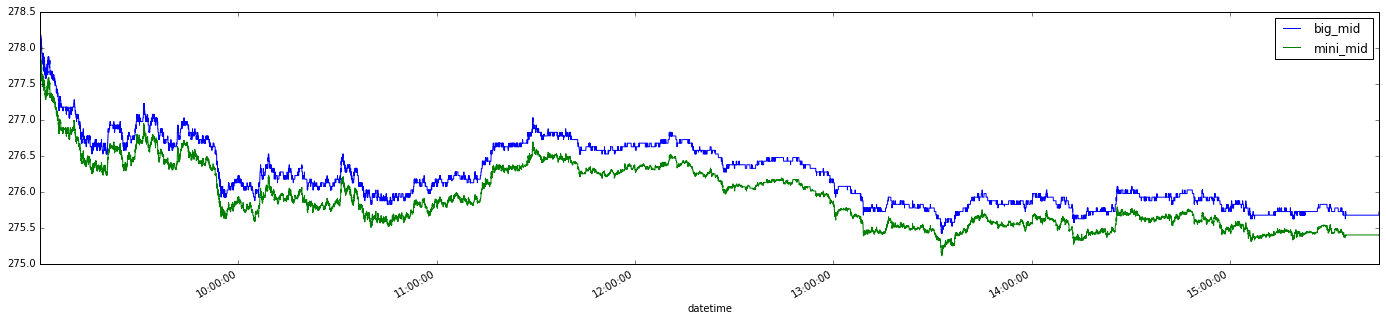

In [13]:
df_total[['big_mid', 'mini_mid']].plot()

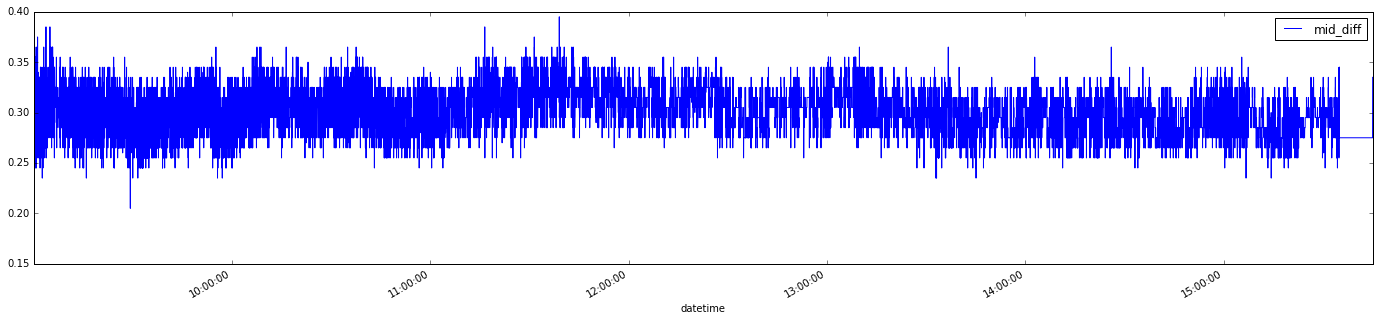

In [14]:
df_total[['mid_diff']].plot()

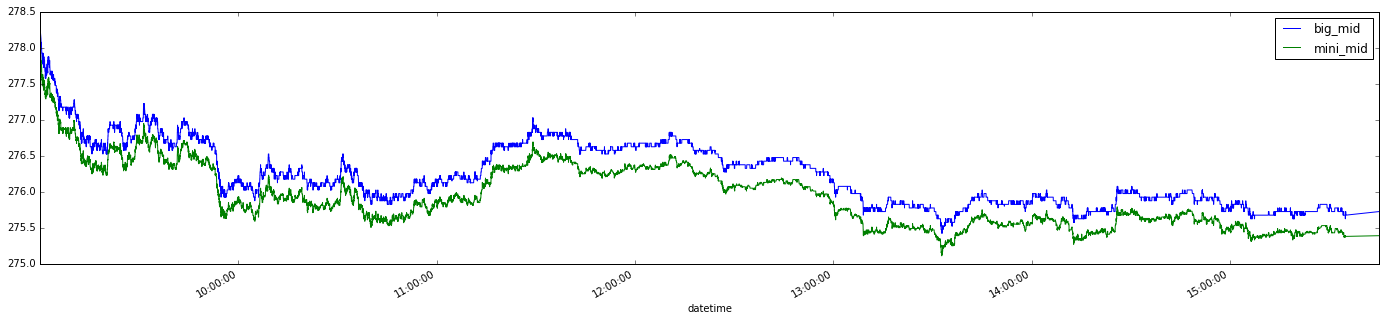

In [15]:
df_total_liquid[['big_mid', 'mini_mid']].plot()

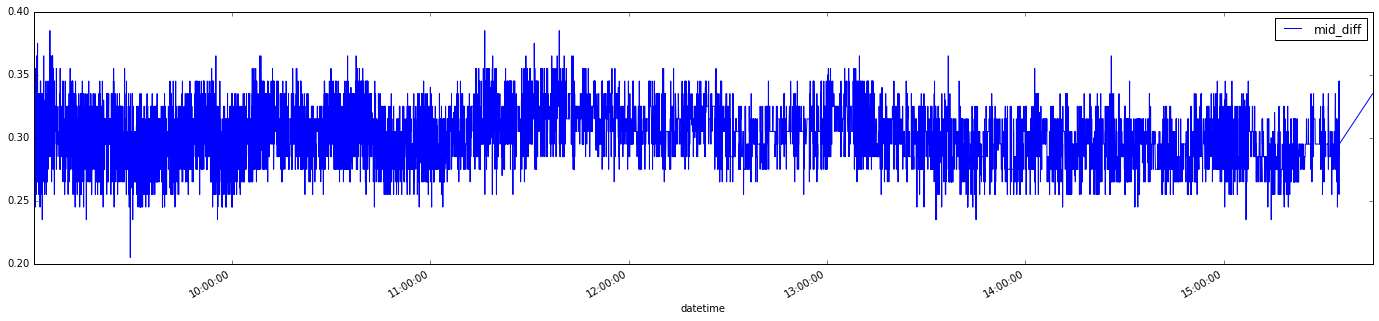

In [16]:
df_total_liquid[['mid_diff']].plot()

In [17]:
print df_total.iloc[1:][['big_mid', 'mini_mid', 'mid_diff']].describe()

             big_mid       mini_mid       mid_diff
count  116867.000000  116859.000000  116859.000000
mean      276.284242     275.983086       0.301036
std         0.491773       0.487659       0.019051
min       275.425000     275.110000       0.165000
25%       275.875000     275.590000       0.285000
50%       276.175000     275.870000       0.305000
75%       276.675000     276.350000       0.315000
max       278.225000     277.980000       0.395000


In [18]:
print df_total_liquid.iloc[1:][['big_mid', 'mini_mid', 'mid_diff']].describe()

            big_mid      mini_mid      mid_diff
count  90947.000000  90947.000000  90947.000000
mean     276.270958    275.969497      0.301461
std        0.469126      0.465315      0.018750
min      275.425000    275.110000      0.205000
25%      275.875000    275.590000      0.285000
50%      276.175000    275.870000      0.305000
75%      276.625000    276.330000      0.315000
max      278.225000    277.970000      0.385000
